# Thompson Sampling

Try to solve the multi-armed bandit problem with Thompson Sampling (explained in UCB notebook).

UCB was a deterministic algorithm.
Thompson Sampling is a probabilistic algorithm.

UCB requires update at every round.
Thompson Sampling can accomodate delayed feedback.

Thompson Sampling gives better empirical evidencea and it consists in choosing the action that maximizes the expected reward with respect to a randomly drawn belief.

STEP 1: At each round n, we consider two number for each ad i:
- $N_i^1(n)$ - the numer of times the ad i got reward 1 up to round n
- $N_i^0(n)$ - the number of times the ad i got reward 0 up to round n

STEP 2: For each ad i, we take a random draw from the distribution - $$\theta_i(n)=\beta(N_i^1(n)+1,N_i^0(n)+1)$$

STEP 3: We select ad that has the highest $\theta_i(n), which is the probability of success$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Ad 1     10000 non-null int64
Ad 2     10000 non-null int64
Ad 3     10000 non-null int64
Ad 4     10000 non-null int64
Ad 5     10000 non-null int64
Ad 6     10000 non-null int64
Ad 7     10000 non-null int64
Ad 8     10000 non-null int64
Ad 9     10000 non-null int64
Ad 10    10000 non-null int64
dtypes: int64(10)
memory usage: 781.3 KB


In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
#Implement Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
num_of_reward1 = [0] * d 
num_of_reward0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(num_of_reward1[i]+1, num_of_reward0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        num_of_reward1[ad] += 1
    else:
        num_of_reward0[ad] += 1
    total_reward = total_reward + reward

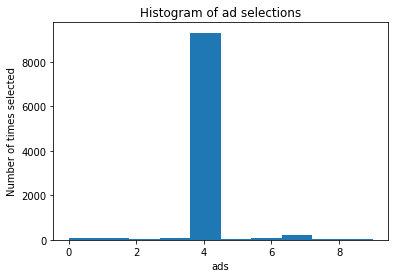

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ad selections')
plt.xlabel('ads')
plt.ylabel('Number of times selected');